# Data Dive 3
## The Billionaire's Club

### Katherine Simon, James Evans, Ashton Morgan, Nicholas Sartino 

In [5]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Read data

df = pd.read_csv('forbes_2640_billionaires.csv', index_col = 0, header = 0)

In [7]:
# Basic Info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2640 entries, 1 to 2540
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                2640 non-null   object 
 1   forbes_id           2640 non-null   object 
 2   net_worth           2640 non-null   float64
 3   age                 2575 non-null   float64
 4   age_range           2640 non-null   int64  
 5   country             2640 non-null   object 
 6   source              2640 non-null   object 
 7   industry            2640 non-null   object 
 8   Age                 2555 non-null   float64
 9   Source of Wealth    2639 non-null   object 
 10  Self-Made Score     558 non-null    float64
 11  Philanthropy Score  411 non-null    float64
 12  Residence           2581 non-null   object 
 13  Citizenship         2629 non-null   object 
 14  Marital Status      2089 non-null   object 
 15  Children            1598 non-null   float64
 16  Education  

In [8]:
# Preview data

df.head()

,name,forbes_id,net_worth,age,age_range,country,source,industry,Age,Source of Wealth,...,Residence,Citizenship,Marital Status,Children,Education,Bachelor,Master,Doctorate,Drop Out,Self Made
rank,,,,,,,,,,,,,,,,,,,,,
1,Bernard Arnault & family,bernard-arnault,211.0,74.0,8,France,LVMH,Fashion & Retail,74.0,LVMH,...,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",1.0,0.0,0.0,0.0,0
2,Elon Musk,elon-musk,180.0,51.0,6,United States,"Tesla, SpaceX",Automotive,52.0,"Tesla, SpaceX, Self Made",...,"Austin, Texas",United States,Single,10.0,"Bachelor of Arts/Science, University of Pennsy...",1.0,0.0,0.0,0.0,1
3,Jeff Bezos,jeff-bezos,114.0,59.0,6,United States,Amazon,Technology,59.0,"Amazon, Self Made",...,"Medina, Washington",United States,Engaged,4.0,"Bachelor of Arts/Science, Princeton University",1.0,0.0,0.0,0.0,1
4,Larry Ellison,larry-ellison,107.0,78.0,8,United States,Oracle,Technology,79.0,"Oracle, Self Made",...,"Lanai, Hawaii",United States,In Relationship,4.0,"Drop Out, University of Chicago; Drop Out, Uni...",0.0,0.0,0.0,1.0,1
5,Warren Buffett,warren-buffett,106.0,92.0,10,United States,Berkshire Hathaway,Finance & Investments,92.0,"Berkshire Hathaway, Self Made",...,"Omaha, Nebraska",United States,"Widowed, Remarried",3.0,"Master of Science, Columbia University; Bachel...",1.0,1.0,0.0,0.0,1


## How many children do the wealthy have?

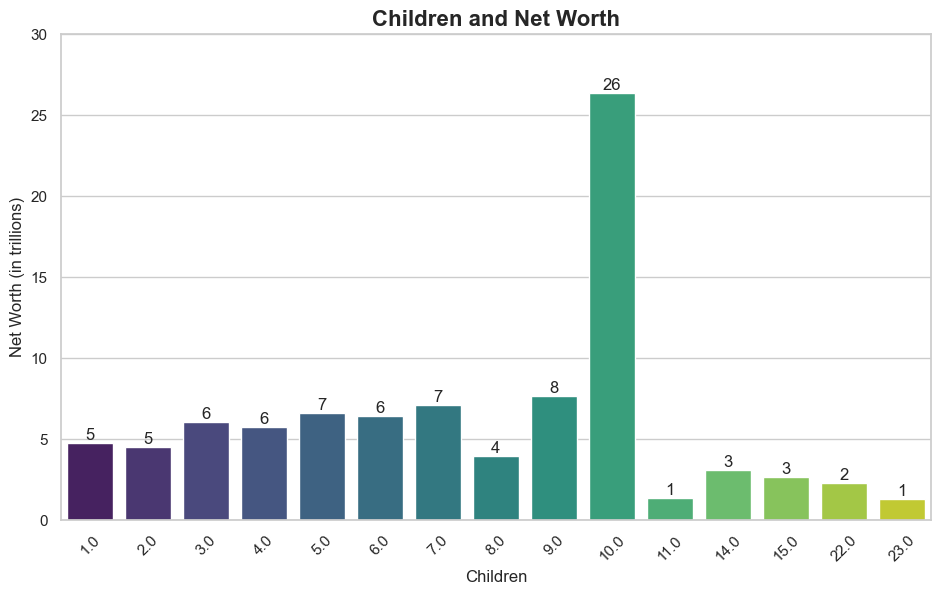

In [9]:
# Children and Net Worth

# set style
sns.set(style = "whitegrid")

# set figure size
plt.figure(figsize=(10,6))

# create bar plot
ax = sns.barplot(x= 'Children', y = 'net_worth', data = df, palette = "viridis", errorbar= None)
plt.title('Children and Net Worth', fontsize = 16, fontweight = 'bold')
plt.xlabel('Children')
plt.ylabel('Net Worth (in trillions)')

# rotate x axis labels so it is easier to read
plt.xticks(rotation = 45)

# adjust y axis scale
plt.ylim(0, 30)

# add count numbers on each bar
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom')
# display results
plt.show()

## How many billions do most billionaires have?

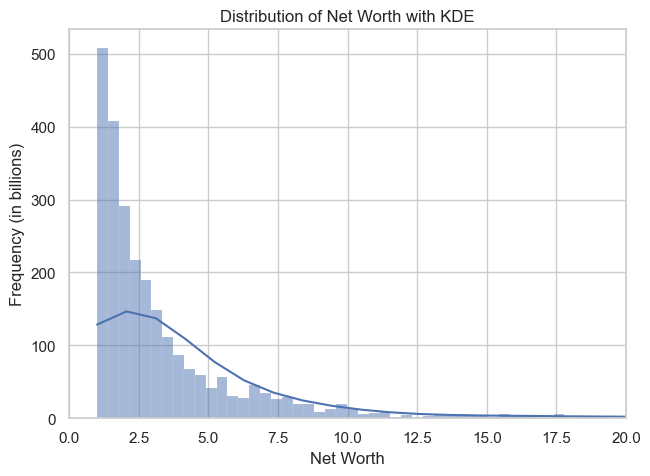

In [15]:
# Distribution of Billionaires

num_bins = 20
# Define range for x-axis
x_range = (0,20)

# Create the histogram 
# KDE refers to the kernel density estimate and is the line that is the overlay on the histogram
sns.histplot(df['net_worth'], kde=True)
plt.xlabel('Net Worth')
plt.ylabel('Frequency (in billions)')
plt.title('Distribution of Net Worth with KDE')

plt.xlim(x_range)
plt.show()

# NET WORTH IS IN BILLIONS

#### Clearly, the vast majority of billionaires have less than 5 billion dollars.

# Which industries produce the most billionaires?

In [9]:
# Group by industry and country and count the billionaires in each combination
industry_country_counts = df.groupby(['industry', 'Citizenship']).size().reset_index(name='Billionaire Count')

# Find the country with the most billionaires in each industry
max_billionaires_per_industry = industry_country_counts.groupby('industry').max()


# Display the result
print(max_billionaires_per_industry)


                              Citizenship  Billionaire Count
industry                                                    
Automotive                        Vietnam                 18
Construction & Engineering  United States                  5
Diversified                       Vietnam                 21
Energy                      United States                 34
Fashion & Retail            United States                 57
Finance & Investments             Vietnam                183
Food & Beverage                   Vietnam                 71
Gambling & Casinos          United States                  6
Healthcare                  United States                 65
Logistics                   United States                  8
Manufacturing                     Vietnam                138
Media & Entertainment       United States                 38
Metals & Mining             United States                 18
Real Estate                 United States                 49
Service                 

# What does the martial status of the wealthy look like?

In [10]:
# Count how many billionaires in each category of relationship status
relationship_counts = df['Marital Status'].value_counts()

#display result
print(relationship_counts)

Married               1711
Divorced               140
Widowed                121
Single                  76
In Relationship         18
Widowed, Remarried      11
Separated               10
Engaged                  2
Name: Marital Status, dtype: int64


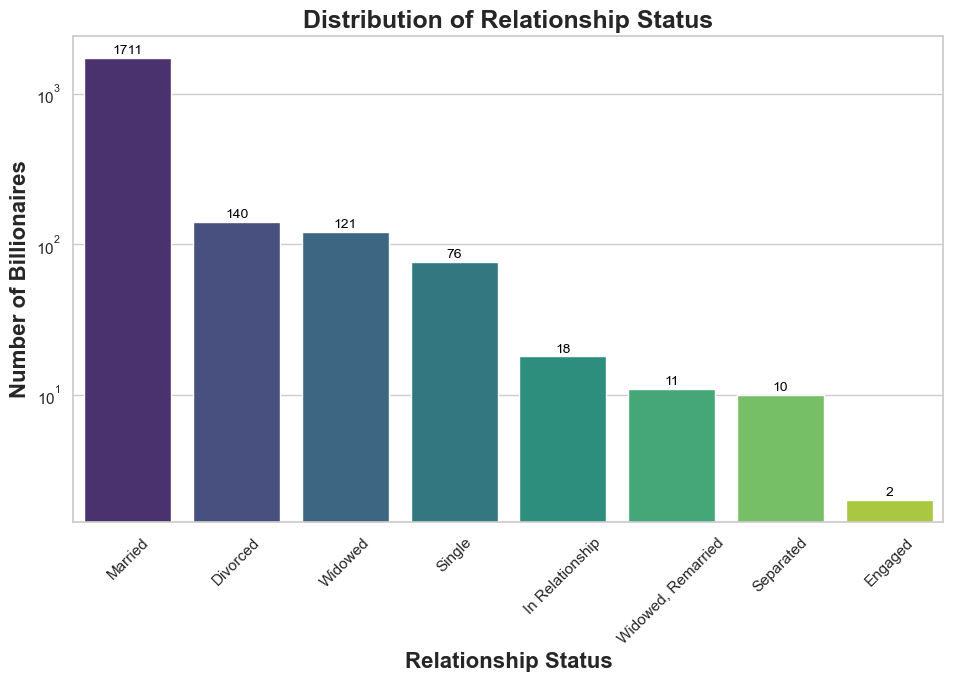

In [16]:
# group data in Marital Status column and count
relationship_counts = df['Marital Status'].value_counts()

# create bar plot
plt.figure(figsize= (10, 6))
ax = sns.barplot(x = relationship_counts.index, y = relationship_counts.values, palette = "viridis")
ax.set_yscale("log")
plt.title('Distribution of Relationship Status', fontsize = 18, fontweight = 'bold')
plt.xlabel('Relationship Status', fontsize = 16, fontweight = 'bold')
plt.ylabel('Number of Billionaires', fontsize = 16, fontweight = 'bold')

# rotate x axis labels
plt.xticks(rotation = 45)

# display actual numbers on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# display result
plt.show()

# Sorted list of billionaires and Formatted Report

In [12]:
top_10_billionaires = df.sort_values(by= 'net_worth', ascending = False).head(10)

print(top_10_billionaires)

                           name          forbes_id  net_worth   age  \
rank                                                                  
1      Bernard Arnault & family    bernard-arnault      211.0  74.0   
2                     Elon Musk          elon-musk      180.0  51.0   
3                    Jeff Bezos         jeff-bezos      114.0  59.0   
4                 Larry Ellison      larry-ellison      107.0  78.0   
5                Warren Buffett     warren-buffett      106.0  92.0   
6                    Bill Gates         bill-gates      104.0  67.0   
7             Michael Bloomberg  michael-bloomberg       94.5  81.0   
8     Carlos Slim Helu & family   carlos-slim-helu       93.0  83.0   
9                 Mukesh Ambani      mukesh-ambani       83.4  65.0   
10                Steve Ballmer      steve-ballmer       80.7  67.0   

      age_range        country              source               industry  \
rank                                                                  

In [19]:
top_10_billionaires = df.sort_values(by= 'net_worth', ascending = False).head(10)

for index, row in top_10_billionaires.iterrows():
    print(f"Name: {row['name']}")
    print(f"Net Worth: {row['net_worth']} billion")
    print(f"Age: {row['age']}")
    print(f"Country: {row['country']}")
    print(f"Source of Wealth: {row['source']}")
    print(f"Industry: {row['industry']}")
    print(f"Marital Status: {row['Marital Status']}")
    print(f"Number of Children: {row['Children']}")
    print(f"Education: {row['Education']}")
    print('-' * 50)    

Name: Bernard Arnault & family
Net Worth: 211.0 billion
Age: 74.0
Country: France
Source of Wealth: LVMH
Industry: Fashion & Retail
Marital Status: Married
Number of Children: 5.0
Education: Bachelor of Arts/Science, Ecole Polytechnique de Paris
--------------------------------------------------
Name: Elon Musk
Net Worth: 180.0 billion
Age: 51.0
Country: United States
Source of Wealth: Tesla, SpaceX
Industry: Automotive
Marital Status: Single
Number of Children: 10.0
Education: Bachelor of Arts/Science, University of Pennsylvania
--------------------------------------------------
Name: Jeff Bezos
Net Worth: 114.0 billion
Age: 59.0
Country: United States
Source of Wealth: Amazon
Industry: Technology
Marital Status: Engaged
Number of Children: 4.0
Education: Bachelor of Arts/Science, Princeton University
--------------------------------------------------
Name: Larry Ellison
Net Worth: 107.0 billion
Age: 78.0
Country: United States
Source of Wealth: Oracle
Industry: Technology
Marital Sta

# Is the "college-dropout" trope true?

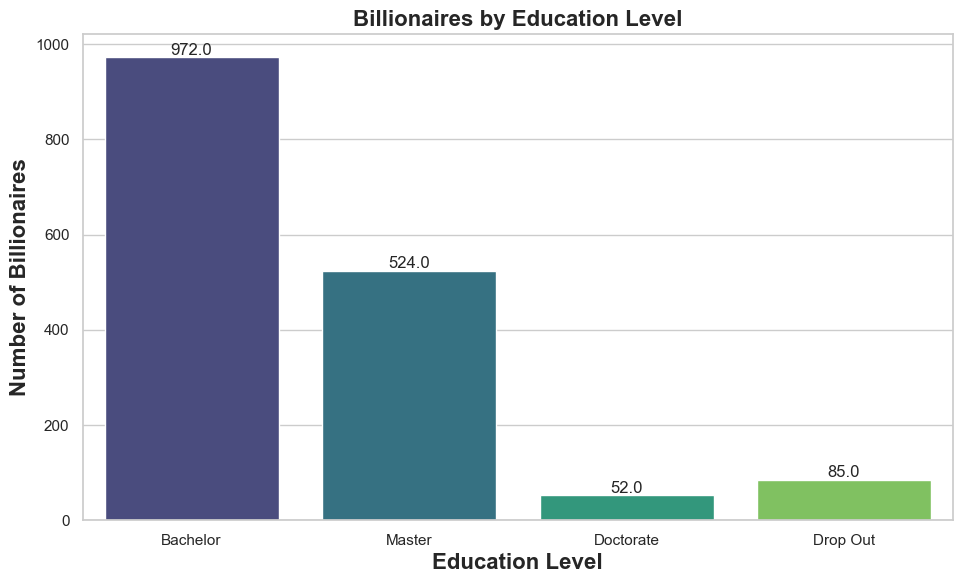

In [23]:
# Education

# Calculate the counts for each education level
education_counts = df[['Bachelor', 'Master', 'Doctorate', 'Drop Out']].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette = "viridis")
plt.title('Billionaires by Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize = 16, fontweight = "bold")
plt.ylabel('Number of Billionaires', fontsize = 16, fontweight = "bold")

# Display the counts on top of the bars
for i, count in enumerate(education_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.show()

# Statistical Analysis

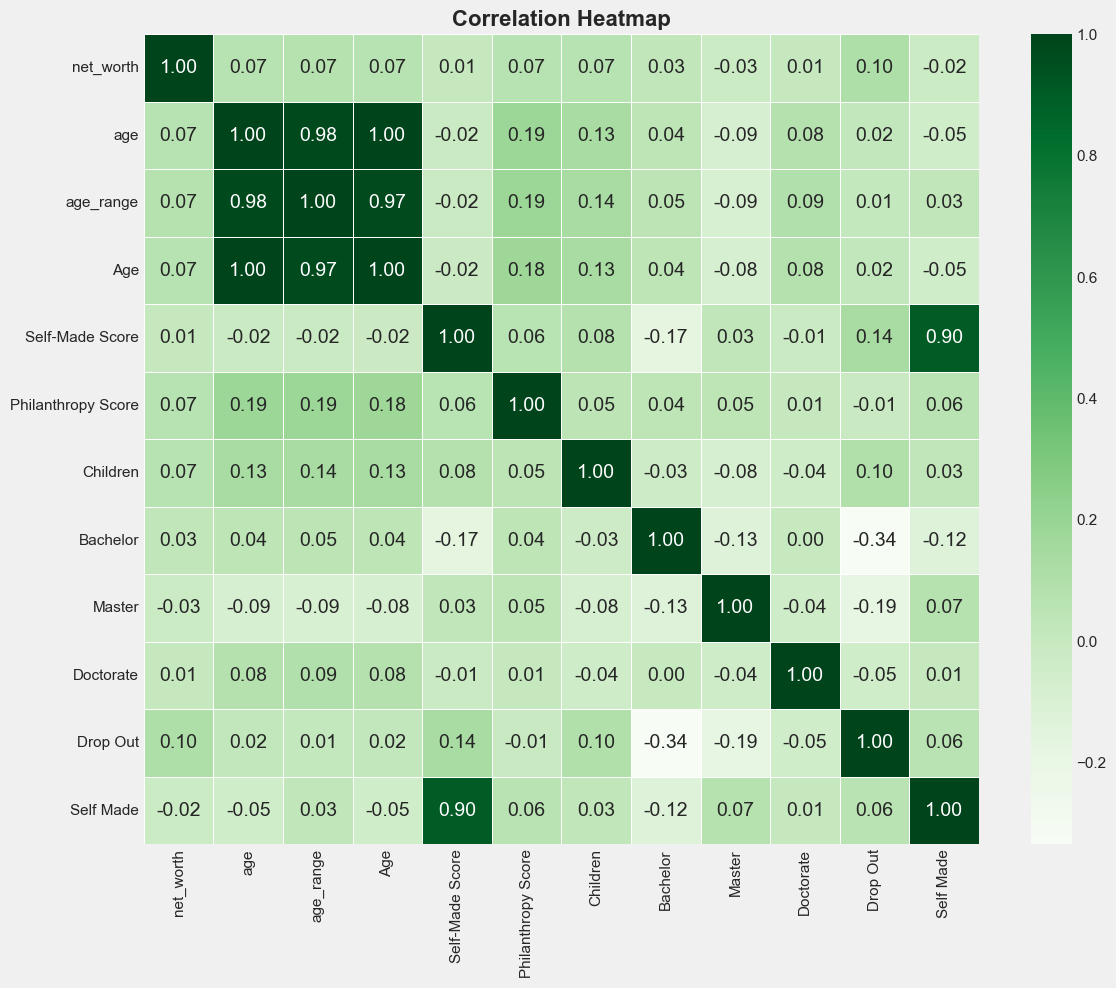

In [47]:
# create correlation matrix
correlation_matrix = df.corr()

# create a heatmap
plt.figure(figsize= (12 ,10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'Greens', fmt = ".2f", linewidths = 0.5 )

#title
plt.title('Correlation Heatmap', fontsize = 16, fontweight = 'bold')

# display
plt.show()